In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Understanding data

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Checking Missing values

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Duplicates

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(keep = 'first', inplace = True)

### Outliers

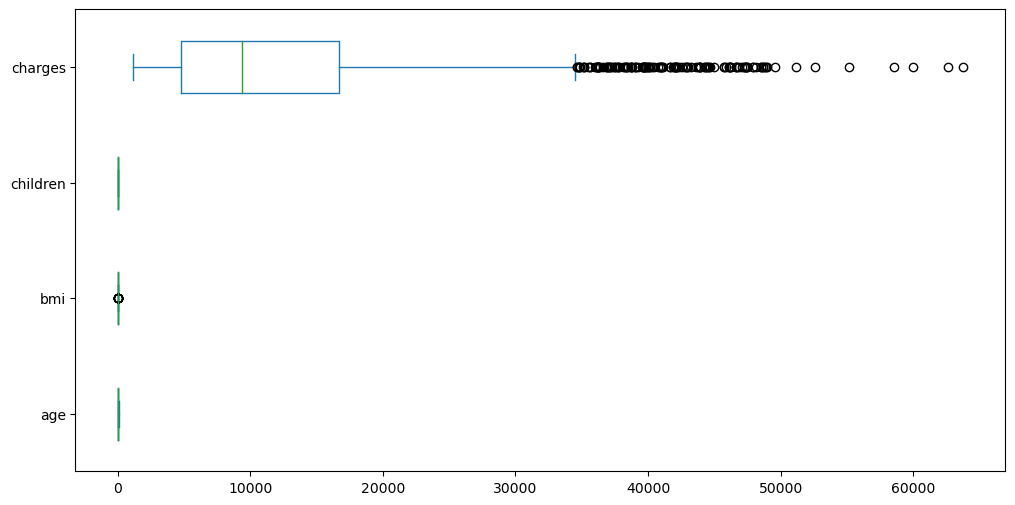

In [11]:
df.select_dtypes(include=['int64','float64']).plot(kind='box', figsize=(12,6), vert=False)
plt.show()

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

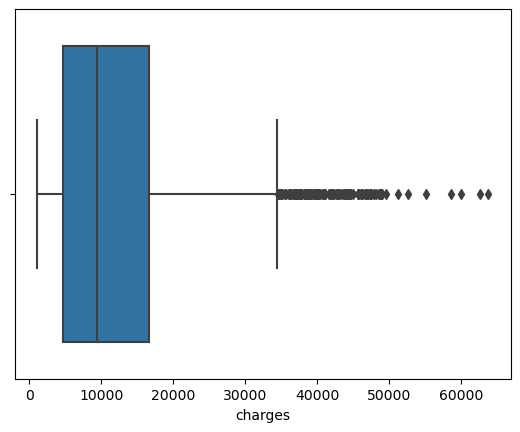

In [12]:
sns.boxplot(df['charges'])

<AxesSubplot:xlabel='charges', ylabel='Count'>

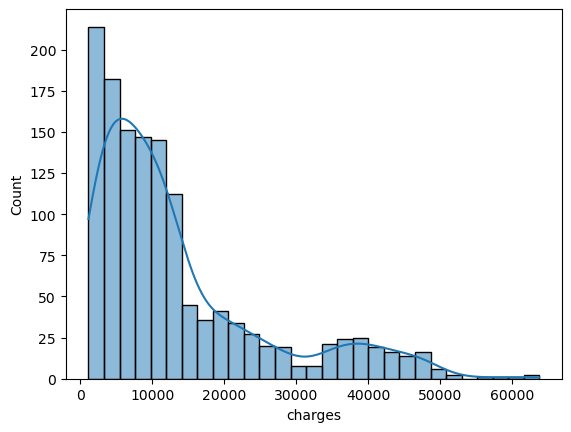

In [16]:
sns.histplot(df['charges'],kde=True)

#### Capping --> Winsorization

In [21]:
df['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [29]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]

In [30]:
outliers

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,34832.7416
19,30,male,35.300,0,yes,southwest,34832.7416
23,34,female,31.920,1,yes,northeast,34832.7416
29,31,male,36.300,2,yes,southwest,34832.7416
30,22,male,35.600,0,yes,southwest,34832.7416
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,34832.7416
1301,62,male,30.875,3,yes,northwest,34832.7416
1303,43,male,27.800,0,yes,southwest,34832.7416
1313,19,female,34.700,2,yes,southwest,34832.7416


In [42]:
upper_bound = df['charges'].quantile(0.99)
upper_bound

34832.7416

In [36]:
lower_bound = df['charges'].quantile(0.001)
lower_bound

1252.95744

In [37]:
df['charges'] = np.where(df['charges'] >= upper_bound, upper_bound,
                        np.where(df['charges'] <= lower_bound, lower_bound,
                                df['charges']))

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

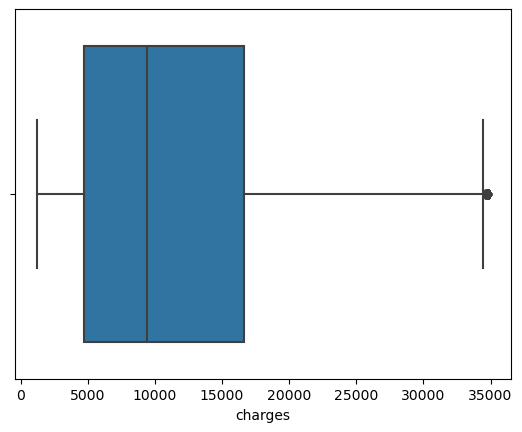

In [38]:
sns.boxplot(df['charges'])

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

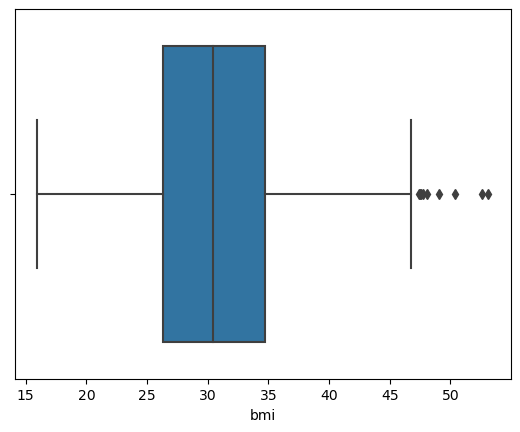

In [43]:
sns.boxplot(df['bmi'])

<AxesSubplot:xlabel='bmi', ylabel='Count'>

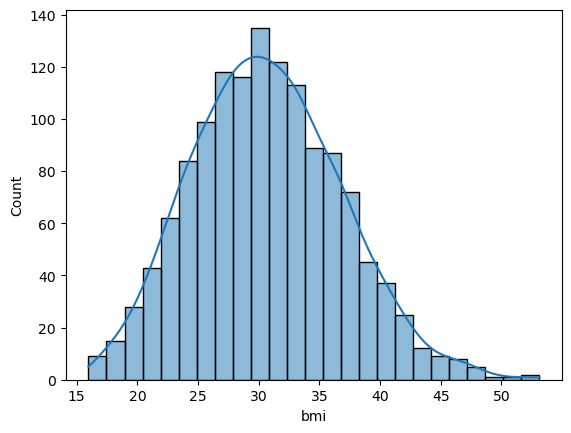

In [45]:
sns.histplot(df['bmi'],kde=True)

##### Z score for detection

In [47]:
mean = df['bmi'].mean()
std_dev = df['bmi'].std()

df['z_score'] = (df['bmi'] - mean)/std_dev

threshold = 3

outliers = df[(df['z_score'] > threshold) | (df['z_score'] < threshold)]

In [48]:
outliers

,age,sex,bmi,children,smoker,region,charges,z_score
0,19,female,27.900,0,yes,southwest,16884.92400,-0.452990
1,18,male,33.770,1,no,southeast,1725.55230,0.509231
2,28,male,33.000,3,no,southeast,4449.46200,0.383011
3,33,male,22.705,0,no,northwest,21984.47061,-1.304564
4,32,male,28.880,0,no,northwest,3866.85520,-0.292347
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.050250
1334,18,female,31.920,0,no,northeast,2205.98080,0.205976
1335,18,female,36.850,0,no,southeast,1629.83350,1.014110
1336,21,female,25.800,0,no,southwest,2007.94500,-0.797226


In [49]:
upper_bound = df['bmi'].quantile(0.9)
upper_bound

38.626000000000005

In [50]:
lower_bound = df['bmi'].quantile(0.01)
lower_bound

17.894199999999998

In [51]:
df['bmi'] = np.where(df['bmi']>=upper_bound,upper_bound,
                    np.where(df['bmi']<=lower_bound,lower_bound,
                            df['bmi']))

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

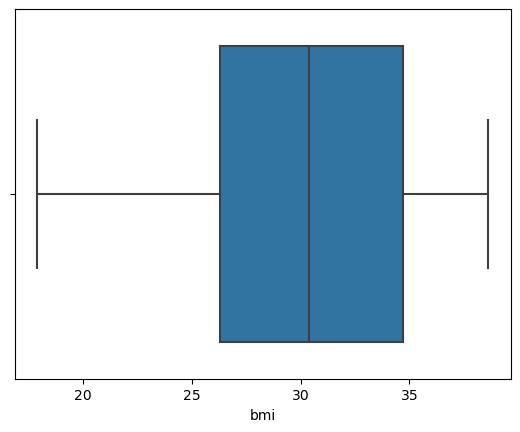

In [52]:
sns.boxplot(df['bmi'])

### Encoding categorical column

#### Sex

In [54]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [55]:
df['Sex_numeric'] = df['sex'].replace({'male':0,'female':1})

In [56]:
df.head()

,age,sex,bmi,children,smoker,region,charges,z_score,Sex_numeric
0,19,female,27.900,0,yes,southwest,16884.92400,-0.452990,1
1,18,male,33.770,1,no,southeast,1725.55230,0.509231,0
2,28,male,33.000,3,no,southeast,4449.46200,0.383011,0
3,33,male,22.705,0,no,northwest,21984.47061,-1.304564,0
4,32,male,28.880,0,no,northwest,3866.85520,-0.292347,0


#### smoker

In [57]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [58]:
df['smoker_numeric'] = df['smoker'].replace({'no':0,'yes':1})

In [59]:
df.head()

,age,sex,bmi,children,smoker,region,charges,z_score,Sex_numeric,smoker_numeric
0,19,female,27.900,0,yes,southwest,16884.92400,-0.452990,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0.509231,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0.383011,0,0
3,33,male,22.705,0,no,northwest,21984.47061,-1.304564,0,0
4,32,male,28.880,0,no,northwest,3866.85520,-0.292347,0,0


#### region

In [60]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [61]:
region_mapping = {'southeast':0,'southwest':1,'northwest':3,'northeast':4}
df['region_numeric'] = df['region'].map(region_mapping)

In [62]:
df.head()

,age,sex,bmi,children,smoker,region,charges,z_score,Sex_numeric,smoker_numeric,region_numeric
0,19,female,27.900,0,yes,southwest,16884.92400,-0.452990,1,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0.509231,0,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0.383011,0,0,0
3,33,male,22.705,0,no,northwest,21984.47061,-1.304564,0,0,3
4,32,male,28.880,0,no,northwest,3866.85520,-0.292347,0,0,3


In [63]:
df.tail()

,age,sex,bmi,children,smoker,region,charges,z_score,Sex_numeric,smoker_numeric,region_numeric
1333,50,male,30.97,3,no,northwest,10600.5483,0.050250,0,0,3
1334,18,female,31.92,0,no,northeast,2205.9808,0.205976,1,0,4
1335,18,female,36.85,0,no,southeast,1629.8335,1.014110,1,0,0
1336,21,female,25.80,0,no,southwest,2007.9450,-0.797226,1,0,1
1337,61,female,29.07,0,yes,northwest,29141.3603,-0.261202,1,1,3
